In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mat = pd.read_csv("matches.csv")

In [4]:
bowl = pd.read_csv("deliveries.csv")

In [6]:
#Firstly looking at the matches dataset.
mat

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#Since umpire3 column has many null values, its better to just drop it.
mat.drop("umpire3", inplace = True, axis = 1)

In [9]:
mat

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [10]:
mat[mat['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [11]:
mat['city'].fillna('Dubai', inplace = True)
#Filled according to the the stadium name.

In [13]:
mat[mat['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [14]:
mat['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [15]:
mat[mat['result'] == 'tie']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan


In [16]:
#To study the expanse of our data, lets see how many seasons are we taking into account
mat['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [ ]:
#Ties are decided by the super over.

In [17]:
mat['winner'].fillna('None', inplace = True)

In [18]:
mat[mat['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [27]:
#The data of the umpires are not available. I checked if I can use the modal value for that particular season or city,
#but the difference between the modal value and other values are not so high. So, I did'nt use it.
#Neither the general modal value of umpire works here. The data of umpires is quite evenly distributed.
mat['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SL Shastri          1
Ulhas Gandhe        1
Sundaram Ravi       1
A Nanda Kishore     1
SJA Taufel          1
Name: umpire1, Length: 61, dtype: int64

In [29]:
#Its better to just replace the values by Not recorded
mat['umpire1'].fillna("Not Recorded", inplace = True)
mat['umpire2'].fillna("Not Recorded", inplace = True)

In [30]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

In [31]:
mat['player_of_match'].fillna("None", inplace = True)

In [34]:
#The player_of_match is not recorded for the matched in which winner was not recorded.
mat['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [35]:
#This is pretty obvious for someone watches IPL, Duckworth Lewis is the last resort of the IPL community.

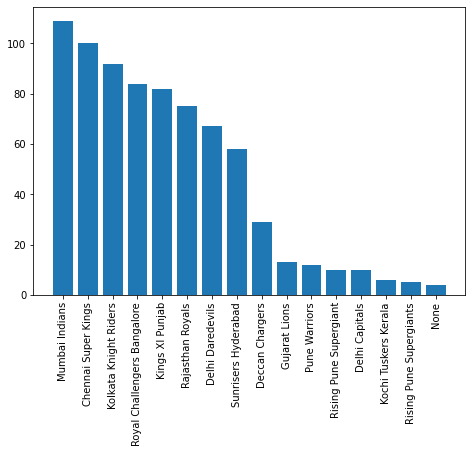

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 'vertical')
ax.bar(mat['winner'].value_counts().index, mat['winner'].value_counts())
plt.show()

In [40]:
mat['player_of_match'].value_counts()
#Chris Gayle win the man of the match more than 20 times!!

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
PD Collingwood     1
EJG Morgan         1
Ishan Kishan       1
PP Ojha            1
DP Nannes          1
Name: player_of_match, Length: 227, dtype: int64

In [45]:
win = 0
loss = 0
for i in range(756):
    if mat['toss_winner'][i] == mat['winner'][i]:
        win = win + 1
    elif mat['winner'][i] != "None":
        loss = loss + 1
print('win = ', win)
print('loss = ', loss)

win =  393
loss =  359


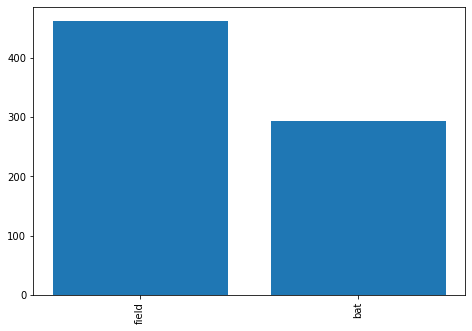

In [51]:
#So, winning the toss does not mean the person will win the match as well.
mat['toss_decision'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 'vertical')
ax.bar(mat['toss_decision'].value_counts().index, mat['toss_decision'].value_counts())
plt.show()

In [48]:
winfield = 0
lossfield = 0
winbat = 0
lossbat = 0
for i in range(756):
    if mat['toss_decision'][i] == 'field':
        if mat['toss_winner'][i] == mat['winner'][i]:
            winfield = winfield + 1
        elif mat['winner'][i] != "None":
            lossfield = lossfield + 1
    elif mat['toss_decision'][i] == 'bat':
        if mat['toss_winner'][i] == mat['winner'][i]:
            winbat = winbat + 1
        elif mat['winner'][i] != "None":
            lossbat = lossbat + 1
print('winfield = ', winfield)
print('lossfield = ', lossfield)
print('winbat = ', winbat)
print('lossbat = ', lossbat)

winfield =  259
lossfield =  201
winbat =  134
lossbat =  158


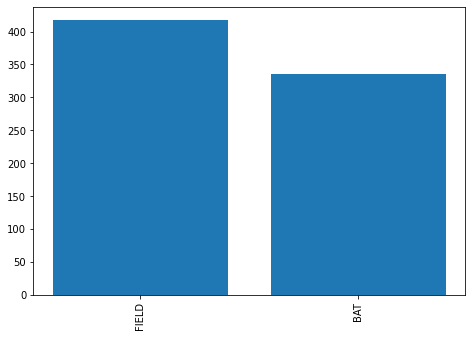

In [50]:
#If we look at the above numbers, it is clear that the team which fields first has the better chance of winning.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 'vertical')
ax.bar(['FIELD', 'BAT'], [417, 335])
plt.show()

In [52]:
mat['venue'].value_counts()
#Maximum IPL matches are held in Eden Gardens, although the distributution is quite scattered.

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [53]:
bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [54]:
bowl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
#Any company should endorse the most successful and consistent player in the IPL.
#It should also focus on whether the fans love that person or not. Not all successful players are loved by fans.
#But since only the performance data is given, I can only predict the successful players.


In [56]:
bowler = bowl['bowler'].unique()

In [64]:
bowl_dict = {}
for item in bowler:
    if len(bowl[bowl['bowler'] == item]) > 180:
        sum0 = bowl[bowl['bowler'] == item]['total_runs'].sum()
        bowl_dict[item] = (sum0*6)/len(bowl[bowl['bowler'] == item])
eco = min(bowl_dict, key = bowl_dict.get)
print(eco)

Sohail Tanvir


In [65]:
#The above analysis helped in finding the bowler with the best economy. 
#Although the best economy in the Dataset is of Adam Gilchrist, which is 0.0, but he only bowled once or twice.
print(bowl_dict[eco])

6.226415094339623


In [ ]:
#A company should endorse Moumbai Indian for its products. 
#As for the bowler, an indian company endorsing Sohail Tanvir for its product could backfire

In [68]:
del bowl_dict['Sohail Tanvir']

In [69]:
eco = min(bowl_dict, key = bowl_dict.get)
print(eco)
print(bowl_dict[eco])

A Chandila
6.282051282051282


In [70]:
#This is the guy for the job ... but upon more research, it is found that he is involved in spot fixing. 
#So, we cannot take him as well
del bowl_dict['A Chandila']
eco = min(bowl_dict, key = bowl_dict.get)
print(eco)
print(bowl_dict[eco])

SMSM Senanayake
6.492307692307692


In [ ]:
#So finally found the guy for the job. 
#If the company specifically requires an Indian guy, then the nationality data has to be provided.

In [ ]:
#Now we will look upon the number of wickets taken by an particular person. 
#In this case, we wont be dividing the number of wickets by the number of balls as it extinguishes the popularity effect.


In [71]:
wicket_dict = {}
for item in bowler:
    if len(bowl[bowl['bowler'] == item]) > 180:
        sum0 = bowl[bowl['bowler'] == item]['dismissal_kind'].isnull().sum()
        wicket_dict[item] = len(bowl[bowl['bowler'] == item]) - sum0
wick = max(wicket_dict, key = wicket_dict.get)
print(wick)
print(wicket_dict[wick])

SL Malinga
188


In [72]:
wicket_dict

{'YS Chahal': 102,
 'S Aravind': 48,
 'SR Watson': 107,
 'STR Binny': 28,
 'A Nehra': 121,
 'B Kumar': 141,
 'BCJ Cutting': 12,
 'Rashid Khan': 60,
 'DJ Hooda': 6,
 'MC Henriques': 42,
 'Bipul Sharma': 22,
 'AB Dinda': 82,
 'DL Chahar': 33,
 'BA Stokes': 29,
 'Imran Tahir': 82,
 'A Zampa': 19,
 'R Bhatia': 82,
 'TG Southee': 34,
 'HH Pandya': 45,
 'MJ McClenaghan': 75,
 'JJ Bumrah': 91,
 'KH Pandya': 42,
 'KA Pollard': 67,
 'TA Boult': 41,
 'PP Chawla': 156,
 'SP Narine': 137,
 'CR Woakes': 26,
 'Kuldeep Yadav': 42,
 'YK Pathan': 46,
 'P Kumar': 102,
 'DS Kulkarni': 91,
 'MS Gony': 39,
 'S Kaushik': 6,
 'DR Smith': 27,
 'SB Jakati': 50,
 'Sandeep Sharma': 90,
 'MM Sharma': 99,
 'AR Patel': 76,
 'MP Stoinis': 16,
 'DT Christian': 36,
 'RD Chahar': 15,
 'Z Khan': 119,
 'CH Morris': 78,
 'PJ Cummins': 19,
 'S Nadeem': 47,
 'A Mishra': 165,
 'CR Brathwaite': 16,
 'Iqbal Abdulla': 45,
 'P Negi': 38,
 'SK Raina': 30,
 'Basil Thampi': 20,
 'SL Malinga': 188,
 'Harbhajan Singh': 161,
 'AS Rajp

In [73]:
#Again a sri-lankan, So Lasith Malinga would the guy for marketing your product.

In [77]:
#Now coming to batsmans: For maintaining the popularity effect, considering only total runs and not average.
batsman = bowl['batsman'].unique()
bat_dict = {}
for item in batsman:
    if len(bowl[bowl['batsman'] == item]) > 180:
        sum0 = bowl[bowl['batsman'] == item]['total_runs'].sum()
        bat_dict[item] = sum0
runs_man = max(bat_dict, key = bat_dict.get)
print(runs_man)
print(bat_dict[runs_man])

SK Raina
5651


In [78]:
#As for the batsman, the company should go with Suresh Raina, The UP guy.